# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [5]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path


%matplotlib inline

In [6]:
# Read the Mapbox API key
mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token)

## Load Data

In [7]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [8]:
# Calculate the mean number of housing units per year (hint: use groupby) 
avg_housing_units = sfo_data.groupby('year')['housing_units'].mean()
avg_housing_units   

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

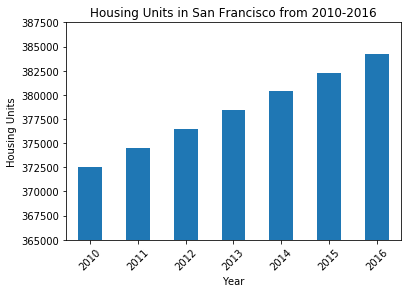

In [9]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart


avg_housing_units_fig=plt.figure()

avg_housing_units_plot = avg_housing_units.plot.bar(x='year',y='housing_units', ylim=(365000, 387500), title="Housing Units in San Francisco from 2010-2016", rot=45)
plt.xlabel('Year')
plt.ylabel('Housing Units')
plt.show()
plt.close(avg_housing_units_fig)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [10]:
# Calculate the average gross rent and average sale price per square foot
rents_df = pd.DataFrame()


avg_gross_rent = sfo_data.groupby('year')['gross_rent'].mean()
avg_sq_footage = sfo_data.groupby('year')['sale_price_sqr_foot'].mean()

rents_df['avg_gross_rent'] = avg_gross_rent
rents_df['avg_sq_footage'] = avg_sq_footage
rents_df

,avg_gross_rent,avg_sq_footage
year,,
2010,1239,369.344353
2011,1530,341.903429
2012,2324,399.389968
2013,2971,483.600304
2014,3528,556.277273
2015,3739,632.540352
2016,4390,697.643709


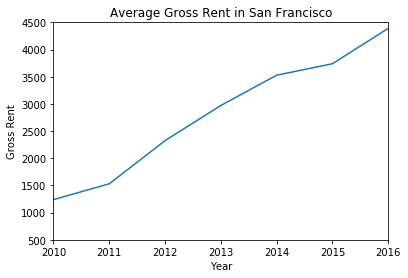

In [11]:
# Plot the Average Gross Rent per Year as a Line Chart 
avg_gross_rent_fig=plt.figure()

avg_gross_rent_plot = avg_gross_rent.plot.line(x='year',y='gross_rent', ylim=(500, 4500), title="Average Gross Rent in San Francisco", rot=360)
plt.xlabel('Year')
plt.ylabel('Gross Rent')
plt.show()
plt.close(avg_gross_rent_fig)

### Average Sales Price per Year

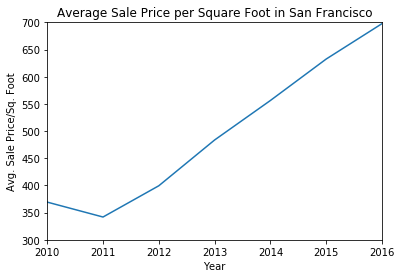

In [12]:
# Plot the Average Sales Price per Year as a line chart
#Assume instructions meant Average Sale Price per Square Foot....Taylor

avg_sq_footage_fig=plt.figure()

avg_sq_footage_plot = avg_sq_footage.plot.line(x='year',y='avg_sq_footage', ylim=(300, 700), title="Average Sale Price per Square Foot in San Francisco", rot=360)
plt.xlabel('Year')
plt.ylabel('Avg. Sale Price/Sq. Foot')
plt.show()
plt.close(avg_sq_footage_fig)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [13]:
# Group by year and neighborhood and then create a new dataframe of the mean values
hood_df = pd.DataFrame()
hood_df = pd.concat([sfo_data], axis='columns', join='inner')
hood_df.reset_index(inplace=True)

hood_df.head()





,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [14]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
hood_df.hvplot.line(x='year', xlabel="Year", y='sale_price_sqr_foot', ylabel="Sale Price/Sq. Foot",
                    title='San Francisco Neighborhood Sale Prices, 2010-2016', groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [40]:
# Getting the data from the top 10 expensive neighborhoods
neighborhoods = sfo_data.groupby("neighborhood").mean()
neighborhood_rank = neighborhoods.sort_values(by='sale_price_sqr_foot', ascending=False)
neighborhood_rank.reset_index(inplace=True)
top10_SF = neighborhood_rank.head(10)

In [51]:
# Plotting the data from the top 10 expensive neighborhoods
top10_SF.hvplot.bar(
    x='neighborhood', xlabel="Neighborhood", y='sale_price_sqr_foot', ylabel="Sale Price/Sq. Foot",
    title="Top 10 Most Expensive Neighborhoods in San Francisco", height=500, width=700, rot=45
)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

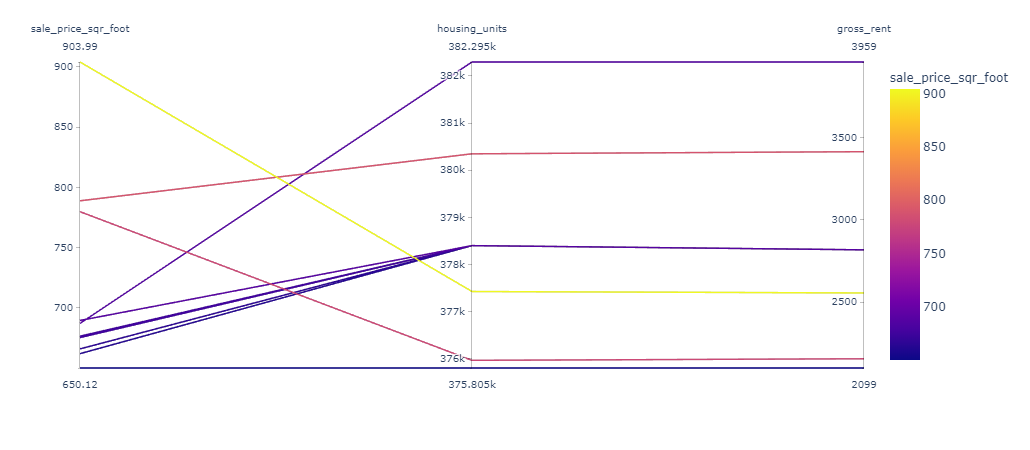

In [42]:
# Parallel Coordinates Plot
#to make it easier to read, plot only shows 'top 10' SF neighborhoods
px.parallel_coordinates(top10_SF, color='sale_price_sqr_foot')

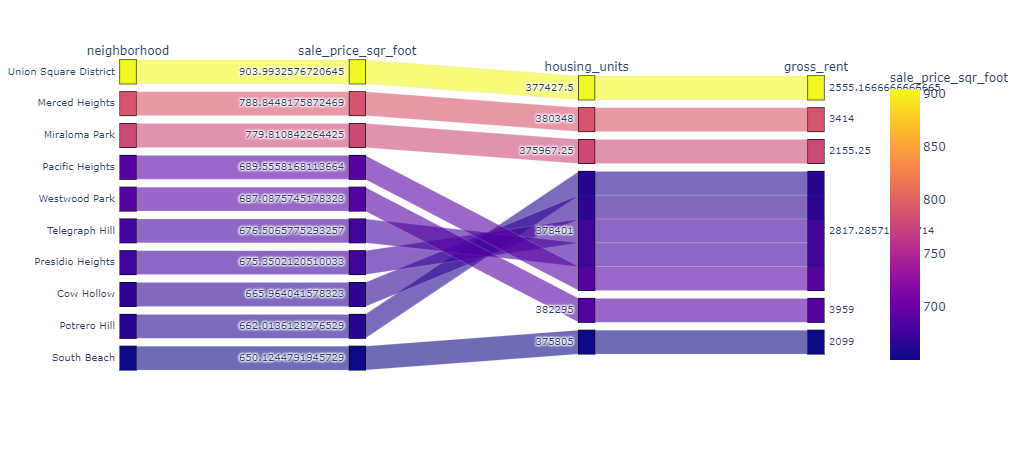

In [43]:
# Parallel Categories Plot
px.parallel_categories(top10_SF, color='sale_price_sqr_foot')

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [44]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [45]:
# Calculate the mean values for each neighborhood
#Note already did step 1 above when creating 'neighborhoods' in Top 10 Neighborhood exercises
neighborhoods.rename(columns={"neighborhood": "Neighborhood"}, inplace=True)
neighborhoods.reset_index("neighborhood", inplace=True)

neighborhoods.head()



,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [48]:
# Join the average values with the neighborhood locations
neighborhoods_geo = pd.DataFrame()
neighborhoods_geo = pd.concat([neighborhoods, df_neighborhood_locations], join="inner", axis='columns')

new_columns = ['Neighborhood', 'Lat', 'Lon', 'sale_price_sqr_foot', 'housing_units', 'gross_rent']
neighborhoods_geo = neighborhoods_geo.reindex(columns=new_columns)

neighborhoods_geo.head()


,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,576.746488,379374.5,3080.333333


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

In [88]:
# Create a scatter mapbox to analyze neighborhood info
#plotly widget continues to not to work. Believe this code is correct - Taylor
px.scatter_mapbox(
    geo_df,
    lat="Lat",
    lon="Lon",
    color='sale_price_sqr_foot',
    title="Average Sale Price/Sq. Foot and Gross Rent in San Francisco",
)

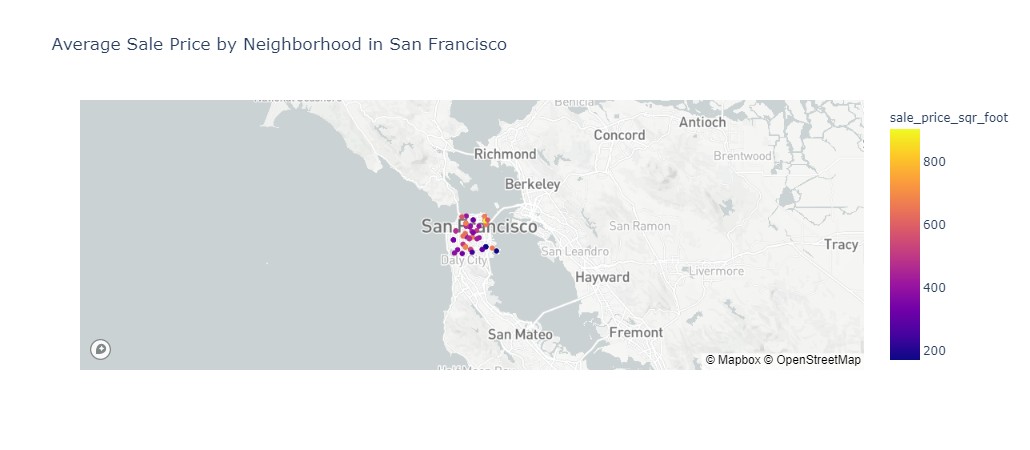

In [49]:
px.scatter_mapbox(neighborhoods_geo, lat='Lat', lon='Lon', color='sale_price_sqr_foot', title='Average Sale Price by Neighborhood in San Francisco')

In [91]:
px.scatter_mapbox(
    geo_df,
    lat="Lat",
    lon="Lon",
    color="sale_price_sqr_foot",
    title="Average Neighborhood Values in San Francisco",
)

In [98]:
#px.scatter_mapbox(
 #   geo_df,
  #  lat="Lat",
   # lon="Lon",
   # color="sale_price_sqr_foot",
)